# Real-Time Parking Spot Detection using YOLOv8
EECE 490 Project

By Lama Hasbini

Important note for running the notebook:

All data files (dataset, videos, etc.) and found on google drive (https://drive.google.com/drive/folders/1msLleke2Aq88VNmmk2QDVoZLJ2TRUasM?usp=sharing).

You might need to change some path directories so that the notebook can run on your personal drive.

# Importing and Downloading

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
#set up google drive to access our data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT_DIR = '/content/drive/MyDrive/EECE490/Data2' # parent directory to where the data is. copy path for "Data2" folder in your drive

In [ ]:
#install and import ultralytics
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.1/107.7 GB disk)


In [ ]:
#install supervision
!pip install supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 798.8 kB/s eta 0:00:00


In [ ]:
#import a pretrained YOLO model
import os
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

from IPython.display import display, Image

100%|██████████| 6.23M/6.23M [00:00<00:00, 68.2MB/s]


# YOLOv8 Training

In [ ]:
!pip install -U jax jaxlib

In [ ]:
from jax.tree_util import tree_unflatten

In [ ]:
results = model.train(data=os.path.join(ROOT_DIR, "data.yaml"), epochs=100)  #train the model.
results = model.val()  #evaluate model performance on the validation set

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/EECE490/Data2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

100%|██████████| 755k/755k [00:00<00:00, 22.2MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/EECE490/Data2/labels/train.cache... 1379 images, 17 backgrounds, 0 corrupt: 100%|██████████| 1379/1379 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/EECE490/Data2/labels/val.cache... 119 images, 1 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100       3.1G      1.398      1.656      1.333         82        640: 100%|██████████| 87/87 [04:25<00:00,  3.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.40s/it]

                   all        119       2536      0.933      0.866      0.934      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.77G     0.9423      0.795      1.065         21        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        119       2536      0.927      0.911      0.948      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.95G     0.8404     0.6747      1.018         42        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]

                   all        119       2536      0.931      0.918      0.955      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.81G     0.7995     0.6239      1.001        115        640: 100%|██████████| 87/87 [01:25<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        119       2536      0.942      0.931      0.962      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.82G      0.778     0.5936     0.9983         50        640: 100%|██████████| 87/87 [01:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        119       2536      0.949      0.924      0.968      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.34G     0.7267     0.5556     0.9747        194        640: 100%|██████████| 87/87 [01:27<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        119       2536      0.948      0.926      0.967      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.85G      0.705     0.5362     0.9672        170        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        119       2536      0.951      0.926      0.964      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         4G     0.6677        0.5     0.9548         51        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        119       2536      0.941      0.931      0.964      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.29G     0.6523     0.4814     0.9521         27        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]

                   all        119       2536      0.952      0.936      0.972      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.38G     0.6576     0.4746     0.9529         62        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        119       2536      0.969      0.938      0.977      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.32G     0.6125     0.4432     0.9311         92        640: 100%|██████████| 87/87 [01:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        119       2536      0.969      0.924      0.973       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       3.7G     0.6099     0.4347     0.9326         50        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        119       2536      0.949      0.944      0.975      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.93G     0.6099     0.4358     0.9341         56        640: 100%|██████████| 87/87 [01:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        119       2536      0.949      0.944      0.973      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.12G     0.6018     0.4351     0.9332         16        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        119       2536      0.963      0.939      0.976      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.51G     0.5854     0.4113     0.9241        169        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        119       2536       0.97      0.936      0.969      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.52G     0.5685     0.4027     0.9183        144        640: 100%|██████████| 87/87 [01:25<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        119       2536      0.967      0.942      0.976      0.875



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       3.8G     0.5752     0.4057     0.9205         56        640: 100%|██████████| 87/87 [01:23<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        119       2536      0.959      0.945      0.975      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.89G     0.5874     0.4054       0.92        132        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        119       2536      0.966      0.942      0.978      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.41G     0.5447     0.3803     0.9114         51        640: 100%|██████████| 87/87 [01:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        119       2536      0.954      0.948      0.975      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.48G     0.5439     0.3824      0.913        126        640: 100%|██████████| 87/87 [01:25<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        119       2536      0.962       0.94       0.97      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.68G     0.5457     0.3801     0.9117         78        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        119       2536      0.967      0.951      0.976      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.25G     0.5431     0.3739     0.9073        121        640: 100%|██████████| 87/87 [01:26<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        119       2536      0.962      0.945      0.978      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.94G     0.5244     0.3635     0.9047        131        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        119       2536      0.967      0.952      0.977      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.22G     0.5167     0.3588      0.901         96        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        119       2536      0.956      0.945      0.977      0.896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.81G     0.5257     0.3636      0.907         81        640: 100%|██████████| 87/87 [01:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

                   all        119       2536      0.959      0.942      0.974      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       3.4G     0.5075     0.3498     0.9005        132        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        119       2536      0.962      0.954      0.979      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.18G     0.5167     0.3526     0.8989        142        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        119       2536       0.96       0.95      0.974      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.07G      0.516     0.3508     0.9028         60        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        119       2536      0.977      0.938      0.975      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.31G     0.5208       0.36     0.9082         44        640: 100%|██████████| 87/87 [01:21<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        119       2536      0.965      0.945      0.976      0.902



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.82G     0.4958     0.3393     0.8925        104        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        119       2536      0.972       0.94      0.974      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.67G     0.4944     0.3364     0.8955        121        640: 100%|██████████| 87/87 [01:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        119       2536       0.97      0.948      0.971      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.42G     0.4909     0.3399     0.8939        106        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        119       2536      0.963      0.954      0.978        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100       3.4G     0.4902     0.3378     0.8924         19        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        119       2536       0.98      0.943      0.979      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       3.2G     0.4811     0.3269     0.8919         34        640: 100%|██████████| 87/87 [01:25<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        119       2536      0.975      0.943      0.976      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.85G     0.4953     0.3354      0.895         50        640: 100%|██████████| 87/87 [01:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        119       2536      0.978      0.947      0.975      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.73G     0.4917     0.3319      0.894         89        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        119       2536      0.969      0.943      0.977      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.82G     0.4918     0.3308     0.8944        144        640: 100%|██████████| 87/87 [01:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        119       2536      0.976      0.946      0.977      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.58G     0.4631     0.3164     0.8845        113        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        119       2536       0.96      0.954      0.978      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.78G     0.4748     0.3214     0.8917        168        640: 100%|██████████| 87/87 [01:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]

                   all        119       2536      0.974      0.951      0.978      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.04G     0.4673     0.3159     0.8853        120        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        119       2536      0.959      0.954      0.979      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.59G     0.4692     0.3179     0.8865         43        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.78it/s]

                   all        119       2536      0.957      0.948      0.973      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.91G       0.46     0.3127     0.8844         97        640: 100%|██████████| 87/87 [01:26<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]

                   all        119       2536      0.982       0.95      0.973      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.62G     0.4681     0.3192     0.8868         28        640: 100%|██████████| 87/87 [01:23<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        119       2536      0.975      0.947      0.976      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.24G     0.4611     0.3105      0.883         66        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        119       2536       0.97      0.947      0.974      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       3.7G     0.4476     0.3036     0.8767        119        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.00s/it]

                   all        119       2536      0.979      0.945      0.976      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.59G     0.4529     0.3053       0.88        108        640: 100%|██████████| 87/87 [01:25<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        119       2536      0.973      0.952      0.978      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         4G     0.4568     0.3063     0.8874         36        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        119       2536      0.969      0.955      0.978      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.44G     0.4568     0.3061     0.8878         36        640: 100%|██████████| 87/87 [01:26<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.04it/s]

                   all        119       2536      0.978      0.945       0.98      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.07G     0.4809     0.3171      0.891         35        640: 100%|██████████| 87/87 [01:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        119       2536      0.968      0.959      0.979      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       3.4G     0.4425     0.2963     0.8758        125        640: 100%|██████████| 87/87 [01:27<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        119       2536      0.973      0.958      0.979      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.27G     0.4269     0.2899     0.8738         83        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        119       2536      0.981      0.952      0.979      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.95G     0.4423     0.2965     0.8792         81        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        119       2536      0.977      0.955      0.976      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.17G     0.4362     0.2957     0.8769         96        640: 100%|██████████| 87/87 [01:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        119       2536      0.982       0.95      0.976       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.55G     0.4392     0.2948     0.8736        128        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        119       2536       0.97      0.956      0.976       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.66G     0.4152      0.281     0.8699         89        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        119       2536       0.97      0.954       0.98      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.89G     0.4354     0.2871     0.8767        120        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.08s/it]

                   all        119       2536      0.973      0.957      0.981      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.31G     0.4299     0.2884     0.8743         88        640: 100%|██████████| 87/87 [01:22<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        119       2536      0.971      0.952      0.979      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.86G     0.4334       0.29     0.8758         93        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        119       2536      0.969      0.957      0.977      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.47G     0.4377       0.29     0.8738        104        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        119       2536      0.978      0.952      0.977      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.38G     0.4239     0.2826     0.8723        169        640: 100%|██████████| 87/87 [01:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        119       2536      0.982      0.954      0.976      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         4G       0.41     0.2783     0.8696         53        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        119       2536      0.983      0.957      0.978      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.38G      0.429     0.2854      0.876         85        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        119       2536      0.981      0.955      0.981      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.03G     0.4196     0.2791     0.8728        116        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        119       2536      0.968      0.954      0.977      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.55G      0.413     0.2767     0.8671         70        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        119       2536      0.975      0.954      0.978      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.51G     0.4071     0.2722      0.867        171        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.02it/s]

                   all        119       2536      0.976      0.953      0.978      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.19G     0.3969      0.267     0.8631         42        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        119       2536      0.976      0.954      0.981      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.36G      0.398     0.2678     0.8621        115        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        119       2536      0.981       0.95      0.978      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.52G      0.389     0.2644     0.8601        115        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all        119       2536      0.984      0.951      0.978      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.35G     0.3948     0.2678     0.8594         52        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        119       2536      0.978      0.958      0.978      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.71G     0.4005     0.2708     0.8661         32        640: 100%|██████████| 87/87 [01:23<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        119       2536      0.976      0.955      0.978      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.73G     0.3905     0.2624     0.8634        104        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        119       2536      0.984      0.947      0.981       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.07G      0.393     0.2644     0.8603         77        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        119       2536      0.979      0.952      0.979      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.69G     0.3982     0.2653     0.8623         47        640: 100%|██████████| 87/87 [01:27<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        119       2536      0.978      0.945      0.976      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.09G     0.4054     0.2716     0.8679        143        640: 100%|██████████| 87/87 [01:23<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        119       2536      0.971      0.959      0.978      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.13G     0.3864     0.2599     0.8624         65        640: 100%|██████████| 87/87 [01:27<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

                   all        119       2536      0.982      0.952      0.978      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.56G     0.3969     0.2647      0.864         77        640: 100%|██████████| 87/87 [01:22<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        119       2536      0.979      0.954      0.976      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.15G     0.3858     0.2563     0.8577        170        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.69it/s]

                   all        119       2536      0.984      0.952      0.977      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.54G     0.3924     0.2595     0.8618        117        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        119       2536      0.979      0.954       0.98      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.83G      0.379     0.2547     0.8571         99        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.60it/s]

                   all        119       2536      0.977      0.951      0.979      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.05G     0.3811     0.2582     0.8598         46        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        119       2536       0.97      0.957      0.981      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.73G     0.3784     0.2535     0.8558        116        640: 100%|██████████| 87/87 [01:26<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.37it/s]

                   all        119       2536      0.976      0.957      0.978      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.73G     0.3732     0.2524     0.8554        138        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        119       2536      0.984      0.953       0.98       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.87G     0.3668     0.2458     0.8537         81        640: 100%|██████████| 87/87 [01:28<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        119       2536      0.979      0.954      0.979      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       3.9G     0.3673     0.2471     0.8532         62        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        119       2536      0.985      0.953      0.977      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.35G     0.3739     0.2494     0.8568        192        640: 100%|██████████| 87/87 [01:26<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        119       2536      0.979      0.956      0.981      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.25G     0.3611     0.2446      0.853         79        640: 100%|██████████| 87/87 [01:24<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        119       2536       0.98      0.961       0.98      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.88G     0.3665     0.2448     0.8543        100        640: 100%|██████████| 87/87 [01:26<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        119       2536      0.985      0.952      0.978      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.43G      0.379     0.2522     0.8639         42        640: 100%|██████████| 87/87 [01:23<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        119       2536      0.978      0.958      0.981      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.26G     0.3635     0.2462     0.8519        132        640: 100%|██████████| 87/87 [01:28<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.59it/s]

                   all        119       2536      0.978      0.958      0.982      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.32G     0.3552     0.2396     0.8502        134        640: 100%|██████████| 87/87 [01:25<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

                   all        119       2536      0.984      0.954       0.98      0.917


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.55G     0.3285     0.2095     0.8367         57        640: 100%|██████████| 87/87 [01:01<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        119       2536      0.981      0.958      0.981      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.43G     0.3224      0.216     0.8363          7        640: 100%|██████████| 87/87 [00:52<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.71it/s]

                   all        119       2536      0.984      0.952      0.982      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.43G     0.3273     0.2087      0.838         29        640: 100%|██████████| 87/87 [00:52<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        119       2536      0.985      0.952      0.982      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.42G      0.315     0.2063     0.8344          6        640: 100%|██████████| 87/87 [00:55<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        119       2536      0.983      0.957      0.981      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.43G     0.3072     0.1962     0.8302        116        640: 100%|██████████| 87/87 [00:54<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        119       2536      0.984      0.956       0.98      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.31G     0.3131     0.2022      0.834         23        640: 100%|██████████| 87/87 [00:53<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        119       2536      0.978      0.956      0.982      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.43G     0.3008     0.1952     0.8286          8        640: 100%|██████████| 87/87 [00:53<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        119       2536       0.98      0.955      0.982      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.42G     0.3002      0.192     0.8282         65        640: 100%|██████████| 87/87 [00:56<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.70it/s]

                   all        119       2536      0.981      0.957      0.981      0.927



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.43G     0.2983     0.1926      0.828         21        640: 100%|██████████| 87/87 [00:53<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        119       2536      0.981      0.958      0.982      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.43G     0.3083     0.1977      0.834         13        640: 100%|██████████| 87/87 [00:53<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        119       2536      0.983      0.958      0.982      0.928



100 epochs completed in 2.467 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.10s/it]


                   all        119       2536      0.981      0.959      0.982      0.928
                 empty        119        743       0.97      0.946      0.972      0.881
              occupied        119       1793      0.993      0.971      0.991      0.975
Speed: 0.6ms preprocess, 4.7ms inference, 0.0ms loss, 6.5ms postprocess per image
Results saved to runs/detect/train
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/EECE490/Data2/labels/val.cache... 119 images, 1 backgrounds, 0 corrupt: 100%|██████████| 119/119 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:12<00:00,  1.59s/it]


                   all        119       2536      0.982      0.958      0.982      0.928
                 empty        119        743      0.971      0.945      0.972      0.881
              occupied        119       1793      0.993      0.971      0.991      0.975
Speed: 1.4ms preprocess, 10.6ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
#copy the runs folder to a desired directory so we can access the results

!scp -r /content/runs '/content/drive/MyDrive/EECE490/Data2'

cp: cannot stat '/content/runs': No such file or directory


# Testing

## Testing on images

In [ ]:
#storing the directories to the obtained weights and test images in variables to avoid resuing the entire path every time
#make sure the paths correspond to the directories in your own Google Drive
weights_path = '/content/drive/MyDrive/EECE490/Data2/runs/detect/train2/weights/best.pt'
image_path ='/content/drive/MyDrive/EECE490/Data2/test/images/'

In [ ]:
#perform a prediction on a random image from the test set
!yolo predict model= {weights_path} source={os.path.join(image_path,'2022-11-15-14-09-20_mp4-38_jpg.rf.3a5808ed7f30028db64e9c2423304a64.jpg')}

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/EECE490/Data2/test/images/2022-11-15-14-09-20_mp4-38_jpg.rf.3a5808ed7f30028db64e9c2423304a64.jpg: 640x640 6 emptys, 5 occupieds, 567.4ms
Speed: 8.8ms preprocess, 567.4ms inference, 3548.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict



image 1/1 /content/drive/MyDrive/EECE490/Data2/test/images/2022-11-15-14-09-20_mp4-38_jpg.rf.3a5808ed7f30028db64e9c2423304a64.jpg: 640x640 6 emptys, 5 occupieds, 10.3ms
Speed: 2.7ms preprocess, 10.3ms inference, 1763.4ms postprocess per image at shape (1, 3, 640, 640)


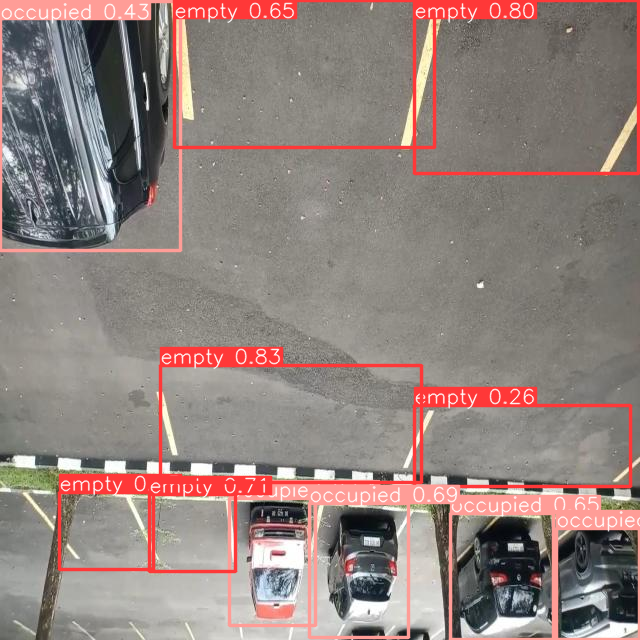

In [ ]:
#display the bounding boxes generated by the prediction on the image itself
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

model = YOLO(weights_path)

results = model(os.path.join(image_path,'2022-11-15-14-09-20_mp4-38_jpg.rf.3a5808ed7f30028db64e9c2423304a64.jpg'))

for r in results:
    im_array = r.plot()  #plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])
    img = cv2.cvtColor(im_array[..., ::-1], cv2.COLOR_BGR2RGB) #Open-CV reads images as BGR, we convert it to RGB
    cv2_imshow(img)

Same as above but for a different image in our testing dataset.

In [ ]:
!yolo predict model={weights_path} source={os.path.join(image_path, '4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-900_jpg.rf.ad34bd8908c5c010d16338a20baa14ae.jpg')}

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/EECE490/Data2/test/images/4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-900_jpg.rf.ad34bd8908c5c010d16338a20baa14ae.jpg: 640x640 12 emptys, 46 occupieds, 12.6ms
Speed: 3.0ms preprocess, 12.6ms inference, 1989.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict



image 1/1 /content/drive/MyDrive/EECE490/Data2/test/images/4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-900_jpg.rf.ad34bd8908c5c010d16338a20baa14ae.jpg: 640x640 12 emptys, 46 occupieds, 7.3ms
Speed: 1.9ms preprocess, 7.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


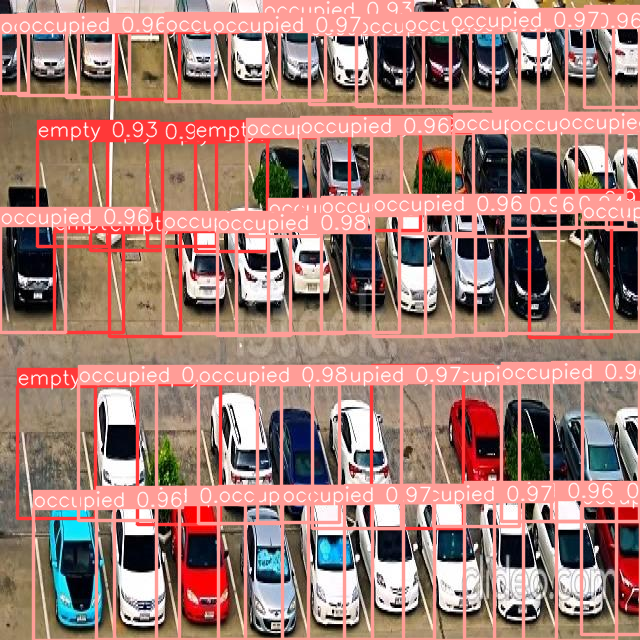

In [ ]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

model = YOLO(weights_path)

results = model(os.path.join(image_path, '4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-900_jpg.rf.ad34bd8908c5c010d16338a20baa14ae.jpg'))
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    img = cv2.cvtColor(im_array[..., ::-1], cv2.COLOR_BGR2RGB) # Open-CV reads images as BGR, we convert it to RGB
    cv2_imshow(img)

In [ ]:
!yolo predict model= {weights_path} source={os.path.join(image_path,'KakaoTalk_20230515_201313910_03_jpg.rf.4c38fdbe9ad57340f593bc99847b8eb0.jpg')}

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/EECE490/Data2/test/images/KakaoTalk_20230515_201313910_03_jpg.rf.4c38fdbe9ad57340f593bc99847b8eb0.jpg: 640x640 1 empty, 2 occupieds, 7.7ms
Speed: 2.3ms preprocess, 7.7ms inference, 1896.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict



image 1/1 /content/drive/MyDrive/EECE490/Data2/test/images/KakaoTalk_20230515_201313910_03_jpg.rf.4c38fdbe9ad57340f593bc99847b8eb0.jpg: 640x640 1 empty, 2 occupieds, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


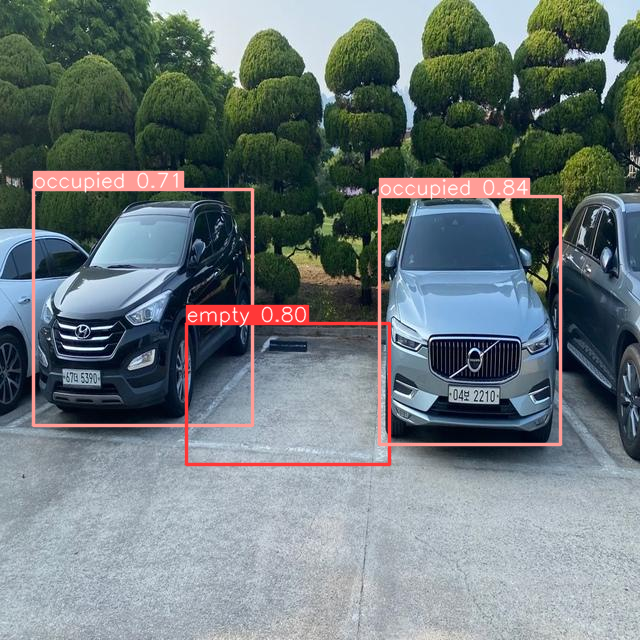

In [ ]:
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

model = YOLO(weights_path)

results = model(os.path.join(image_path, 'KakaoTalk_20230515_201313910_03_jpg.rf.4c38fdbe9ad57340f593bc99847b8eb0.jpg'))
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    img = cv2.cvtColor(im_array[..., ::-1], cv2.COLOR_BGR2RGB) # Open-CV reads images as BGR, we convert it to RGB
    cv2_imshow(img)

In [ ]:
#generate a prediction for all the test imaged. you can open any image in "runs/direct/predict4" to view the resulting bounding boxes.
!yolo task=detect \
mode=predict \
model={weights_path} \
conf=0.5 \
source=/content/drive/MyDrive/EECE490/Data2/test/images #double check this directory incase it is a different path in your case

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs

image 1/21 /content/drive/MyDrive/EECE490/Data2/test/images/2022-11-15-14-09-20_mp4-38_jpg.rf.3a5808ed7f30028db64e9c2423304a64.jpg: 640x640 5 emptys, 4 occupieds, 10.2ms
image 2/21 /content/drive/MyDrive/EECE490/Data2/test/images/2022-11-15-14-11-26_mp4-37_jpg.rf.a368384b115412a38ec594eb9a0c172f.jpg: 640x640 4 emptys, 4 occupieds, 7.7ms
image 3/21 /content/drive/MyDrive/EECE490/Data2/test/images/4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-117_jpg.rf.96abf782a7cb9561b17c06a8442b2f3e.jpg: 640x640 15 emptys, 43 occupieds, 7.4ms
image 4/21 /content/drive/MyDrive/EECE490/Data2/test/images/4k-time-lapse-car-parking-lot-stock-video-download-video-clip-now-istock_TyROSAGZ_mp4-137_jpg.rf.afc6730f9dbfb65e3b7c5112cdc3b00a.jpg: 640x640 15 emptys, 43 occupieds, 7.4ms
image 5/21 /content/drive/M

## Testing on Videos

We will now test our model on 2 videos we imported from an open source website.

In [ ]:
VIDEO_PATH= "/content/drive/MyDrive/EECE490/parking1.mp4" #make sure the path is consistent before running

In [ ]:
import cv2
import os
from random import randint  # Import randint to generate random colors

video_path_out = '{}_out.mp4'.format(VIDEO_PATH)

cap = cv2.VideoCapture(VIDEO_PATH)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# Load a model
model = YOLO(weights_path)  # load a custom model

threshold = 0.5

# Define a list of colors for classes
colors = [(randint(0, 255), randint(0, 255), randint(0, 255)) for _ in range(len(model.names))]

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            color = colors[int(class_id)]
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, color, 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()



0: 384x640 15 emptys, 158.4ms
Speed: 8.7ms preprocess, 158.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 emptys, 113.0ms
Speed: 2.5ms preprocess, 113.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 emptys, 114.9ms
Speed: 2.0ms preprocess, 114.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 emptys, 120.5ms
Speed: 2.7ms preprocess, 120.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 16 emptys, 123.3ms
Speed: 5.1ms preprocess, 123.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 emptys, 116.9ms
Speed: 2.2ms preprocess, 116.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 emptys, 106.8ms
Speed: 2.1ms preprocess, 106.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 14 emptys, 90.8ms
Speed: 2.3ms preprocess, 90.8ms inference, 0.7ms postprocess per im

In [ ]:
VIDEO_PATH= "/content/drive/MyDrive/EECE490/vecteezy_parking-lot-movement_1623435.mp4"

In [ ]:
import cv2
import os
from random import randint  # Import randint to generate random colors

video_path_out = '{}_out.mp4'.format(VIDEO_PATH)

cap = cv2.VideoCapture(VIDEO_PATH)
ret, frame = cap.read()
H, W, _ = frame.shape
out = cv2.VideoWriter(video_path_out, cv2.VideoWriter_fourcc(*'MP4V'), int(cap.get(cv2.CAP_PROP_FPS)), (W, H))

model_path = os.path.join('.', 'runs', 'detect', 'train', 'weights', 'last.pt')

# Load a model
model = YOLO(weights_path)  # load a custom model

threshold = 0.1

# Define a list of colors for classes
colors = [(randint(0, 255), randint(0, 255), randint(0, 255)) for _ in range(len(results.names))]

while ret:

    results = model(frame)[0]

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result

        if score > threshold:
            color = colors[int(class_id)]
            cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), color, 4)
            cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                        cv2.FONT_HERSHEY_SIMPLEX, 1.3, color, 3, cv2.LINE_AA)

    out.write(frame)
    ret, frame = cap.read()

cap.release()
out.release()
cv2.destroyAllWindows()


0: 384x640 1 empty, 44 occupieds, 106.8ms
Speed: 4.4ms preprocess, 106.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 empty, 46 occupieds, 101.7ms
Speed: 2.3ms preprocess, 101.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 empty, 44 occupieds, 102.2ms
Speed: 2.4ms preprocess, 102.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 empty, 41 occupieds, 106.4ms
Speed: 2.2ms preprocess, 106.4ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 empty, 41 occupieds, 105.9ms
Speed: 2.5ms preprocess, 105.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 empty, 44 occupieds, 101.4ms
Speed: 2.2ms preprocess, 101.4ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 empty, 42 occupieds, 102.3ms
Speed: 2.5ms preprocess, 102.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1

The results can be viewed on the output videos stored on Google Drive (parking1.mp4_out.mp4 and vecteezy_parking-lot-movement_1623435.mp4_out.mp4)

## Live Webcam

We will use an outside code for this part since it is outside the scope of what we learned in class/YOLOv8.

Source Code: https://colab.research.google.com/gist/kirisakow/325a557d89262e8d6a4f2918917e82b4/real-time-object-detection-in-webcam-video-stream-using-ultralytics-yolov8.ipynb


In [ ]:
#importing necessary libraries
from base64 import b64decode, b64encode
from google.colab.output import eval_js
from IPython.display import display, Javascript
from PIL import Image
from ultralytics import YOLO
from ultralytics.engine.results import Results
import io
import numpy as np

IMG_SHAPE = [640, 480]
IMG_QUALITY = 0.8

In [ ]:
def start_stream():
    js = Javascript(f'''
    const IMG_SHAPE = {IMG_SHAPE};
    const IMG_QUALITY = {IMG_QUALITY};
    ''' + '''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
        stream.getVideoTracks()[0].stop();
        video.remove();
        div.remove();
        video = null;
        div = null;
        stream = null;
        imgElement = null;
        captureCanvas = null;
        labelElement = null;
    }

    function onAnimationFrame() {
        if (!shutdown) {
            window.requestAnimationFrame(onAnimationFrame);
        }
        if (pendingResolve) {
            var result = "";
            if (!shutdown) {
                captureCanvas.getContext('2d').drawImage(video, 0, 0, IMG_SHAPE[0], IMG_SHAPE[1]);
                result = captureCanvas.toDataURL('image/jpeg', IMG_QUALITY)
            }
            var lp = pendingResolve;
            pendingResolve = null;
            lp(result);
        }
    }

    async function createDom() {
        if (div !== null) {
            return stream;
        }

        div = document.createElement('div');
        div.style.border = '2px solid black';
        div.style.padding = '3px';
        div.style.width = '100%';
        div.style.maxWidth = '600px';
        document.body.appendChild(div);

        const modelOut = document.createElement('div');
        modelOut.innerHTML = "<span>Status: </span>";
        labelElement = document.createElement('span');
        labelElement.innerText = 'No data';
        labelElement.style.fontWeight = 'bold';
        modelOut.appendChild(labelElement);
        div.appendChild(modelOut);

        video = document.createElement('video');
        video.style.display = 'block';
        video.width = div.clientWidth - 6;
        video.setAttribute('playsinline', '');
        video.onclick = () => { shutdown = true; };
        stream = await navigator.mediaDevices.getUserMedia(
            {video: { facingMode: "environment"}});
        div.appendChild(video);

        imgElement = document.createElement('img');
        imgElement.style.position = 'absolute';
        imgElement.style.zIndex = 1;
        imgElement.onclick = () => { shutdown = true; };
        div.appendChild(imgElement);

        const instruction = document.createElement('div');
        instruction.innerHTML =
            '<span style="color: red; font-weight: bold;">' +
            'When finished, click here or on the video to stop this demo</span>';
        div.appendChild(instruction);
        instruction.onclick = () => { shutdown = true; };

        video.srcObject = stream;
        await video.play();

        captureCanvas = document.createElement('canvas');
        captureCanvas.width = IMG_SHAPE[0]; //video.videoWidth;
        captureCanvas.height = IMG_SHAPE[1]; //video.videoHeight;
        window.requestAnimationFrame(onAnimationFrame);

        return stream;
    }
    async function takePhoto(label, imgData) {
        if (shutdown) {
            removeDom();
            shutdown = false;
            return '';
        }

        var preCreate = Date.now();
        stream = await createDom();

        var preShow = Date.now();
        if (label != "") {
            labelElement.innerHTML = label;
        }

        if (imgData != "") {
            var videoRect = video.getClientRects()[0];
            imgElement.style.top = videoRect.top + "px";
            imgElement.style.left = videoRect.left + "px";
            imgElement.style.width = videoRect.width + "px";
            imgElement.style.height = videoRect.height + "px";
            imgElement.src = imgData;
        }

        var preCapture = Date.now();
        var result = await new Promise((resolve, reject) => pendingResolve = resolve);
        shutdown = false;

        return {
            'create': preShow - preCreate,
            'show': preCapture - preShow,
            'capture': Date.now() - preCapture,
            'img': result,
        };
    }
    ''')
    display(js)

def take_photo(label, img_data):
    data = eval_js(f'takePhoto("{label}", "{img_data}")')
    return data

In [ ]:
def js_response_to_image(js_response) -> Image.Image:
    _, b64_str = js_response['img'].split(',')
    jpeg_bytes = b64decode(b64_str)
    image = Image.open(io.BytesIO(jpeg_bytes))
    return image

def turn_non_black_pixels_visible(rgba_compatible_array: np.ndarray) -> np.ndarray:
    rgba_compatible_array[:, :, 3] = (rgba_compatible_array.max(axis=2) > 0).astype(int) * 255
    return rgba_compatible_array

def black_transparent_rgba_canvas(w, h) -> np.ndarray:
    return np.zeros([w, h, 4], dtype=np.uint8)

def draw_annotations_on_transparent_bg(detection_result: Results) -> Image.Image:
    black_rgba_canvas = black_transparent_rgba_canvas(*detection_result.orig_shape)
    transparent_canvas_with_boxes_invisible = detection_result.plot(font='verdana', masks=False, img=black_rgba_canvas)
    transparent_canvas_with_boxes_visible = turn_non_black_pixels_visible(transparent_canvas_with_boxes_invisible)
    image = Image.fromarray(transparent_canvas_with_boxes_visible, 'RGBA')
    return image

In [ ]:
start_stream()
img_data = ''
while True:
    js_response = take_photo('Capturing...', img_data)
    if not js_response:
        break
    captured_img = js_response_to_image(js_response)
    for detection_result in model(source=np.array(captured_img), verbose=False):
        annotations_img = draw_annotations_on_transparent_bg(detection_result)
        with io.BytesIO() as buffer:
            annotations_img.save(buffer, format='png')
            img_as_base64_str = str(b64encode(buffer.getvalue()), 'utf-8')
            img_data = f'data:image/png;base64,{img_as_base64_str}'